# Logistic Regression with non-linear features

## import library

In [435]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [436]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)

shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64


## plot the data

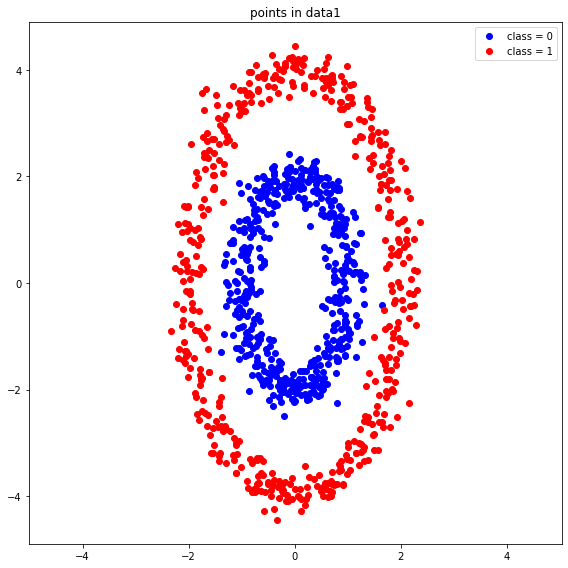

In [437]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

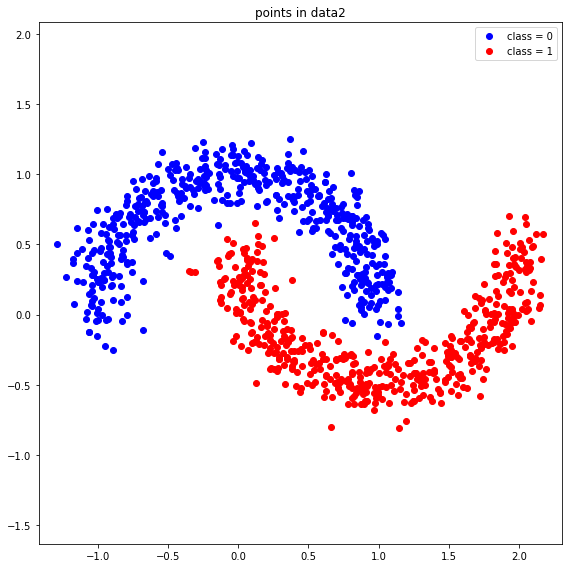

In [438]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [439]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 첫번째 데이터 셋에 대한 classifier 를 정의하기 위해서 각 포인트에 대해 feature function 정의
    # data1_point 가 인풋 데이터 전부에 대한
    shape = point[:,0].shape
    one = np.ones(shape)
    x = point[:,0]
    y= point[:,1]
    feature = np.c_[one, x,y, np.power(x,2), np.power(y,2)]


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

In [440]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #data2_point 가 인풋
    shape = point[:,0].shape
    one = np.ones(shape)
    x = point[:,0]
    y= point[:,1]
    feature = np.c_[one, x, np.power(x,2), np.power(x,3), y]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [441]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #세타가 모델 파라미터일 때 위에서 정의한 feature 간의 linear?)inner product를 통해
    value = np.dot(feature, theta)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [442]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [443]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    f = compute_linear_regression(theta, feature)
    value = sigmoid(f)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [444]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h = compute_logistic_regression(theta, feature)
    residual = -label*np.log1p(h)-(1-label)*np.log1p(1-h)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [445]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(feature)
    residual = compute_residual(theta, feature, label)
    loss = (1/n)*np.sum(residual)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [446]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = len(feature)
    feature_T = np.transpose(feature)
    residual = compute_logistic_regression(theta, feature) - label
    gradient = (1/n)*np.dot(feature_T, residual)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [447]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete  the blanks
    #
    h = compute_logistic_regression(theta, feature)
    h[h>=0.5]=1
    h[h<0.5]=0
    correct = h ==label
    accuracy = len(correct[correct == True])/ len(label)



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [480]:
data1_number_iteration   = 10000
data2_number_iteration   = 100000 

data1_learning_rate   = 0.1 
data2_learning_rate   = 0.4 

data1_number_feature    = 5
data2_number_feature    = 5 

theta1  = np.zeros(data1_number_feature)
theta2  = np.zeros(data2_number_feature)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [481]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature = compute_feature1(data1_point)
    theta1      = theta1 - data1_learning_rate*compute_gradient(theta1, feature, data1_label)
    loss1       = compute_loss(theta1, feature, data1_label)
    accuracy1   = compute_accuracy(theta1, feature, data1_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1

In [482]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 
    feature = compute_feature2(data2_point)
    theta2      = theta2 - data2_learning_rate*compute_gradient(theta2, feature, data2_label)
    loss2       = compute_loss(theta2, feature, data2_label)
    accuracy2   = compute_accuracy(theta2, feature, data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

___

___

## functions for presenting the results

___

___

In [483]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [484]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [485]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [486]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [487]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [488]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [489]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [490]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [491]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # dataset1 에 대해 linear regression 값, linear regression 값이 0이 되는 지점은 검정선
    # feature 에 따라서 얻은 classifier 그림 그리기
    norm = colors.TwoSlopeNorm(vcenter=0)

    linear_regression_values = data1_theta_optimal[0]+data1_theta_optimal[1]*XX+data1_theta_optimal[2]*YY+data1_theta_optimal[3]*np.power(XX,2)+data1_theta_optimal[4]*np.power(YY,2)
    _contour = plt.contourf(XX, YY, linear_regression_values,levels=100, cmap="RdBu_r", norm = norm)    
    plt.colorbar(_contour)

    class0 = np.where(data1_label ==0)
    class1 = np.where(data1_label ==1)
    plt.scatter(data1_point_x[class0],data1_point_y[class0], color = 'blue', label = 'class0',s=5)
    plt.scatter(data1_point_x[class1],data1_point_y[class1], color = 'red', label = 'class1',s=5)

    linear_regression_f = plt.contour(XX,YY,linear_regression_values, levels=0, colors='k')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [492]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    norm = colors.TwoSlopeNorm(vcenter=0)

    linear_regression_values = data2_theta_optimal[0] + data2_theta_optimal[1]*XX + data2_theta_optimal[2]*np.power(XX,2) + data2_theta_optimal[3]*np.power(XX,3) + data2_theta_optimal[4]*YY
    _contour = plt.contourf(XX, YY, linear_regression_values,levels=100, cmap="RdBu_r", norm=norm)    
    plt.colorbar(_contour)

    class0 = np.where(data2_label ==0)
    class1 = np.where(data2_label ==1)
    plt.scatter(data2_point_x[class0],data2_point_y[class0], color = 'blue', label = 'class0',s=7)
    plt.scatter(data2_point_x[class1],data2_point_y[class1], color = 'red', label = 'class1',s=7)

    linear_regression_f = plt.contour(XX,YY,linear_regression_values, levels=0, colors='k')



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [493]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    logistic_regression_values = sigmoid(data1_theta_optimal[0]+data1_theta_optimal[1]*XX+data1_theta_optimal[2]*YY+data1_theta_optimal[3]*np.power(XX,2)+data1_theta_optimal[4]*np.power(YY,2))
    _contour = plt.contourf(XX, YY, logistic_regression_values,levels=100, cmap="RdBu_r")    
    plt.colorbar(_contour)

    class0 = np.where(data1_label ==0)
    class1 = np.where(data1_label ==1)
    plt.scatter(data1_point_x[class0],data1_point_y[class0], color = 'blue', label = 'class0',s=5)
    plt.scatter(data1_point_x[class1],data1_point_y[class1], color = 'red', label = 'class1',s=5)

    logistic_regression_f = plt.contour(XX,YY,logistic_regression_values, levels=0, colors='k')




    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [494]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    logistic_regression_values = sigmoid(data2_theta_optimal[0] + data2_theta_optimal[1]*XX + data2_theta_optimal[2]*np.power(XX,2) + data2_theta_optimal[3]*np.power(XX,3) + data2_theta_optimal[4]*YY)

    _contour = plt.contourf(XX, YY, logistic_regression_values,levels=100, cmap="RdBu_r")    
    plt.colorbar(_contour)

    class0 = np.where(data2_label ==0)
    class1 = np.where(data2_label ==1)
    plt.scatter(data2_point_x[class0],data2_point_y[class0], color = 'blue', label = 'class0',s=7)
    plt.scatter(data2_point_x[class1],data2_point_y[class1], color = 'red', label = 'class1',s=7)

    logistic_regression_f = plt.contour(XX,YY,logistic_regression_values, levels=0, colors='k')



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 = -0.6879230909
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 = -0.6885079680
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  0.9990000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.9960000000
**************************************************
## [RESULT 05]
**************************************************


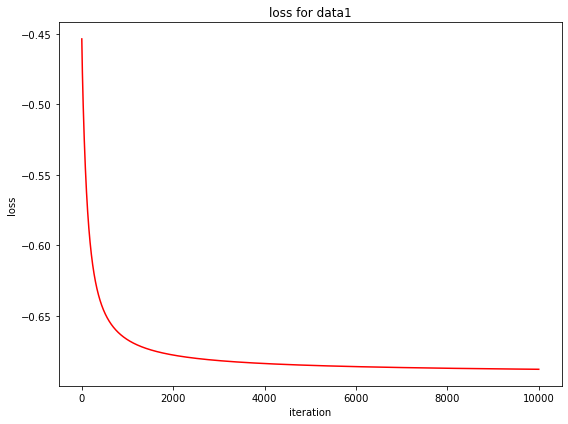

**************************************************
## [RESULT 06]
**************************************************


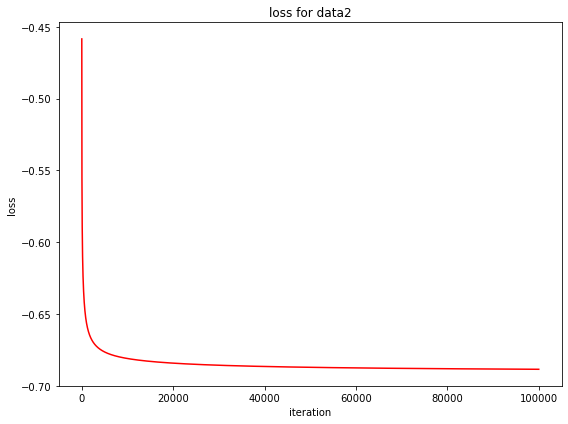

**************************************************
## [RESULT 07]
**************************************************


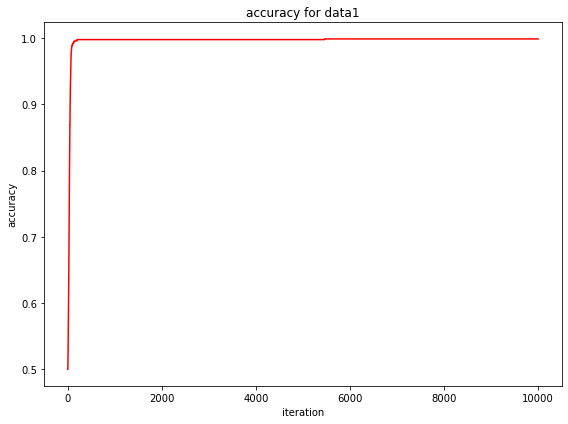

**************************************************
## [RESULT 08]
**************************************************


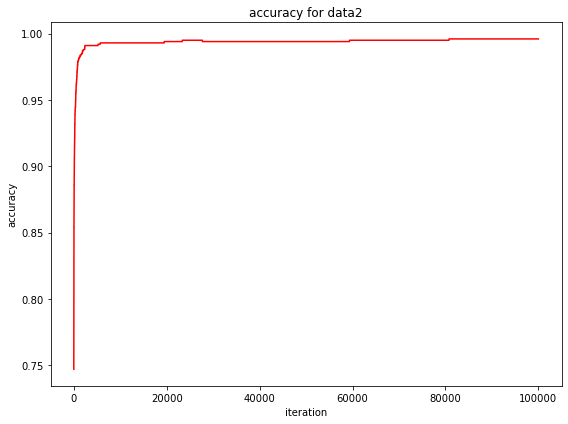

**************************************************
## [RESULT 09]
**************************************************


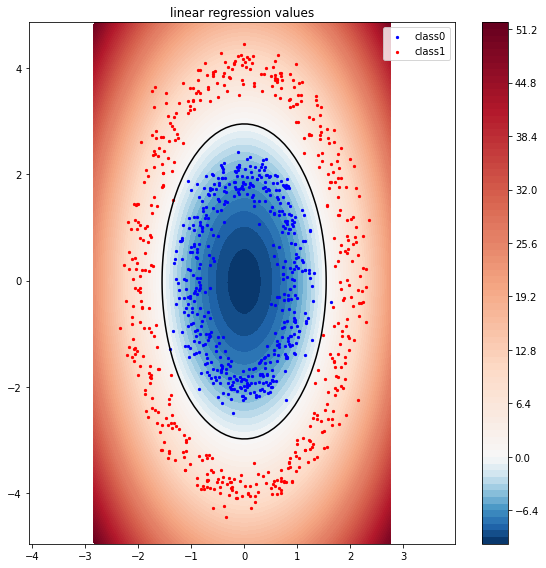

**************************************************
## [RESULT 10]
**************************************************


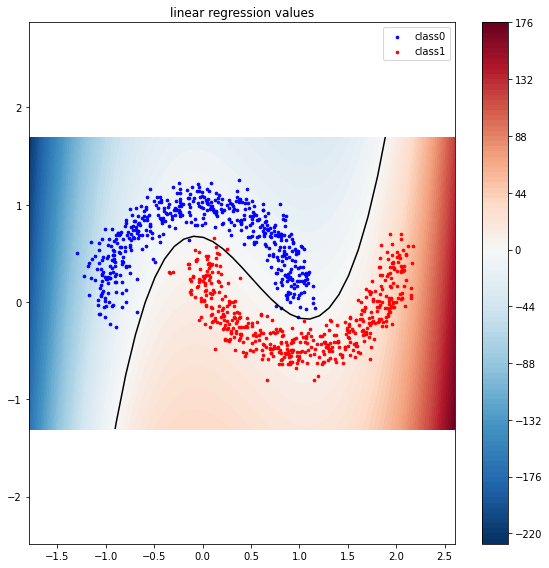

**************************************************
## [RESULT 11]
**************************************************


/var/folders/tv/fkp_wd191t92nyzrbq4pdskr0000gn/T/ipykernel_44856/1344184055.py:29: UserWarning: No contour levels were found within the data range.
  logistic_regression_f = plt.contour(XX,YY,logistic_regression_values, levels=0, colors='k')


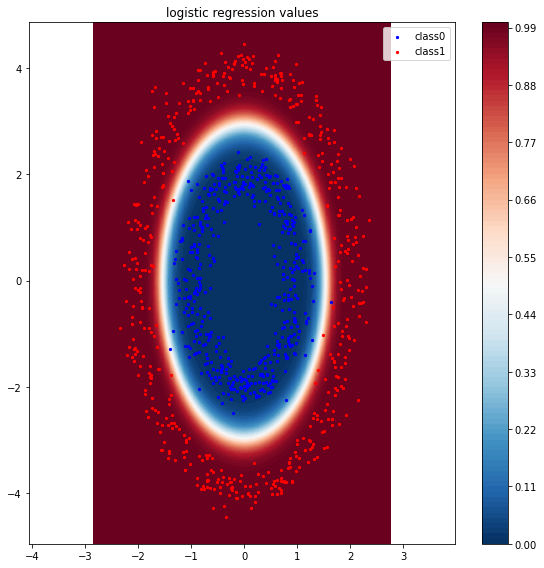

**************************************************
## [RESULT 12]
**************************************************


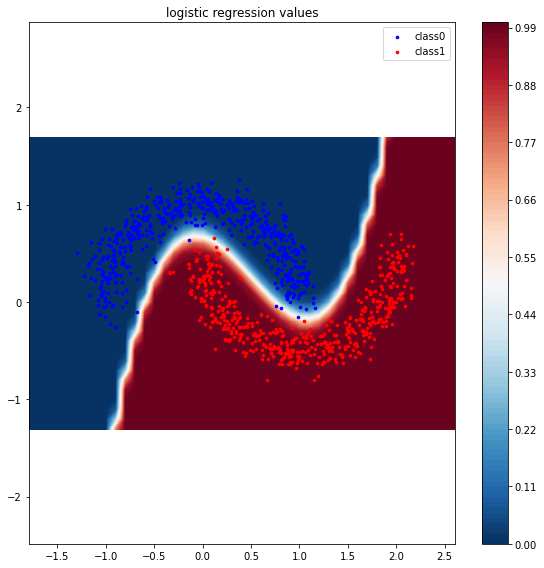

In [495]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)